In [1]:
#!pip install scikit-fuzzy matplotlib numpy
import numpy as np
import matplotlib.pyplot as plt
import skfuzzy as fuzz
from skfuzzy import control as ctrl

### se preparan los conjuntos de datos a trabajar y las funciones de pertenencia 

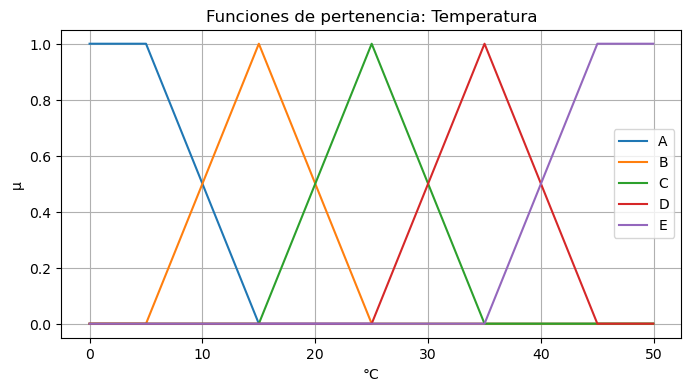

In [2]:
# Universo de la variable TEMPERATURA (°C)
# Es muy importante esta lina, tambien define la cantidad de puntos de discretización (1000) en este caso 50 / 1000 = 0.05, variar este valor resultante entre 500 o 2000
x_temp = np.arange(0, 50, 0.05)  # 0 a 50 °C

# Conjuntos difusos (funciones de pertenencia)
T_A  = fuzz.trapmf(x_temp, [0, 0, 5, 15]) # trapezoidal
T_B  = fuzz.trimf(x_temp, [5, 15, 25])   #
T_C  = fuzz.trimf(x_temp, [15, 25, 35])   
T_D  = fuzz.trimf(x_temp, [25, 35, 45])   
T_E  = fuzz.trapmf(x_temp, [35, 45, 50, 50])

# Visualización
plt.figure(figsize=(8, 4))
plt.plot(x_temp, T_A, label='A')
plt.plot(x_temp, T_B, label='B')
plt.plot(x_temp, T_C, label='C')
plt.plot(x_temp, T_D, label='D')
plt.plot(x_temp, T_E, label='E')
plt.title('Funciones de pertenencia: Temperatura')
plt.xlabel('°C'); plt.ylabel('μ')
plt.ylim(-0.05, 1.05); plt.legend(); plt.grid(True)
plt.show()

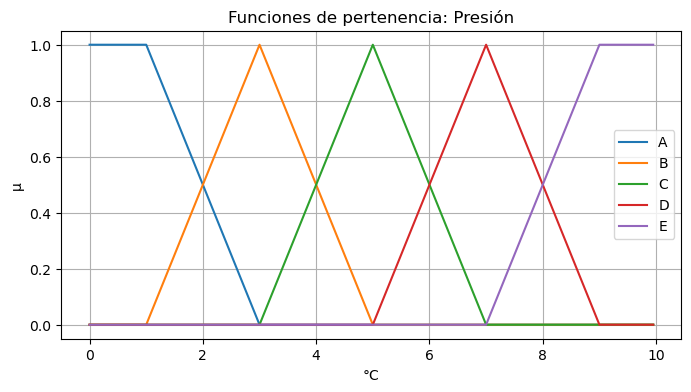

In [3]:
y_pres = np.arange(0, 10, 0.05)  # 0 a 50 °C

# Conjuntos difusos (funciones de pertenencia)
Y_A  = fuzz.trapmf(y_pres, [0, 0, 1, 3]) # trapezoidal
Y_B  = fuzz.trimf(y_pres, [1, 3, 5])   #
Y_C  = fuzz.trimf(y_pres, [3, 5, 7])   
Y_D  = fuzz.trimf(y_pres, [5, 7, 9])   
Y_E  = fuzz.trapmf(y_pres, [7, 9, 10, 10])

# Visualización
plt.figure(figsize=(8, 4))
plt.plot(y_pres, Y_A, label='A')
plt.plot(y_pres, Y_B, label='B')
plt.plot(y_pres, Y_C, label='C')
plt.plot(y_pres, Y_D, label='D')
plt.plot(y_pres, Y_E, label='E')
plt.title('Funciones de pertenencia: Presión')
plt.xlabel('°C'); plt.ylabel('μ')
plt.ylim(-0.05, 1.05); plt.legend(); plt.grid(True)
plt.show()

### punto 1 

In [4]:
# 1) universos de discurso de los conjuntos de datos 
x_temp = ctrl.Antecedent(np.linspace(0, 50, 501), 't')        # entrada
y_pres = ctrl.Consequent(np.linspace(0, 10, 1001), 'p')      # salida

# 2) Funciones de pertenencia 
x_temp['t_a'] = fuzz.trapmf(x_temp.universe, [0, 0, 5, 15])
x_temp['t_b'] = fuzz.trimf(x_temp.universe,  [5, 15, 25])
x_temp['t_c'] = fuzz.trimf(x_temp.universe,  [15, 25, 35])
x_temp['t_d'] = fuzz.trimf(x_temp.universe,  [25, 35, 45])
x_temp['t_e'] = fuzz.trapmf(x_temp.universe, [35, 45, 50, 50])

y_pres['p_a'] = fuzz.trapmf(y_pres.universe, [0, 0, 1, 3])
y_pres['p_b'] = fuzz.trimf(y_pres.universe,  [1, 3, 5])
y_pres['p_c'] = fuzz.trimf(y_pres.universe, [3, 5, 7])
y_pres['p_d'] = fuzz.trimf(y_pres.universe, [5, 7, 9])
y_pres['p_e'] = fuzz.trapmf(y_pres.universe,  [7, 9, 10, 10])


# 3) Reglas
r1 = ctrl.Rule(x_temp['t_a'], y_pres['p_c'])   # 1) si t_a entonces p_c
r2 = ctrl.Rule(x_temp['t_b'], y_pres['p_a'])   # 2) si t_b entonces p_a
r3 = ctrl.Rule(x_temp['t_c'], y_pres['p_d'])   # 3) si t_c entonces p_d
r4 = ctrl.Rule(x_temp['t_d'], y_pres['p_e'])   # 4) si t_d entonces p_e
r5 = ctrl.Rule(x_temp['t_e'], y_pres['p_b'])   # 5) si t_e entonces p_b


# 4) Sistema y simulación
sistema = ctrl.ControlSystem([r1, r2, r3, r4, r5])
sim = ctrl.ControlSystemSimulation(sistema)



Salida nítida p* = 6.291042584434649


/home/cristian/anaconda3/lib/python3.12/site-packages/skfuzzy/control/fuzzyvariable.py:125: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


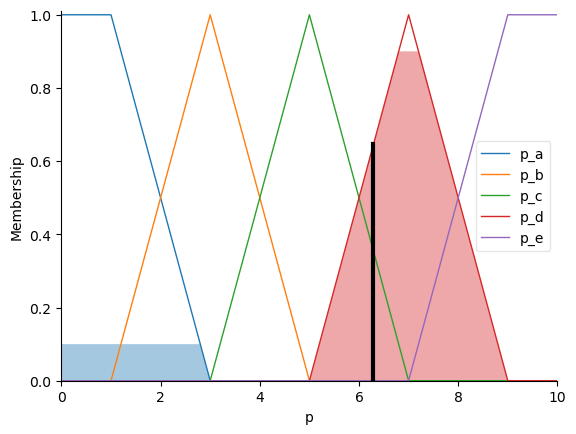

In [5]:
# 5) Evalúa para un valor 'singleton' de t
sim.input['t'] = 24
sim.compute()

# Salida difusa (agregada) -> defuzzificada por defecto (centroid)
print("Salida nítida p* =", sim.output['p'])
# Curva difusa de salida disponible en: sim.ctrl.outputs['p'].term (interno)
# Muestra curvas base y la activación/aglomeración resultante + línea del centroide
y_pres.view(sim=sim)   # 'p' es el Consequent

### punto 2

Salida nítida p* = 2.1295305299935277  de temp x =  13.3
Salida nítida p* = 3.847378946849887  de temp x =  18.8
Salida nítida p* = 7.74074074074074  de temp x =  30.0
Salida nítida p* = 4.601620036275244  de temp x =  42.3
Salida nítida p* = 3.000000000000003  de temp x =  47.0


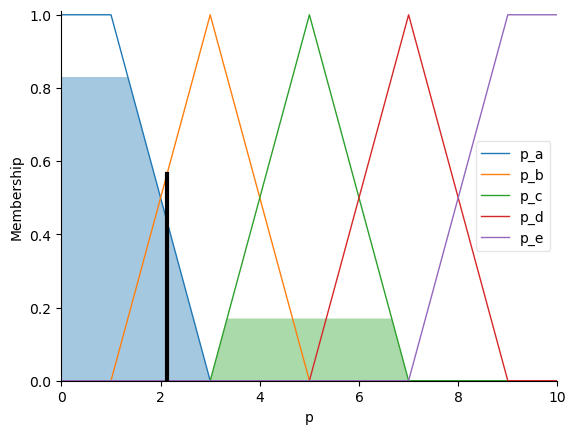

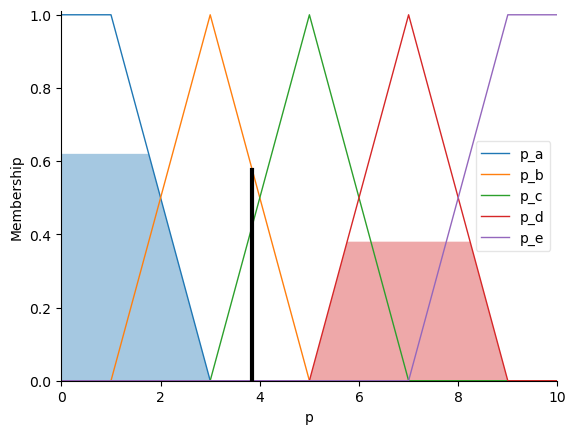

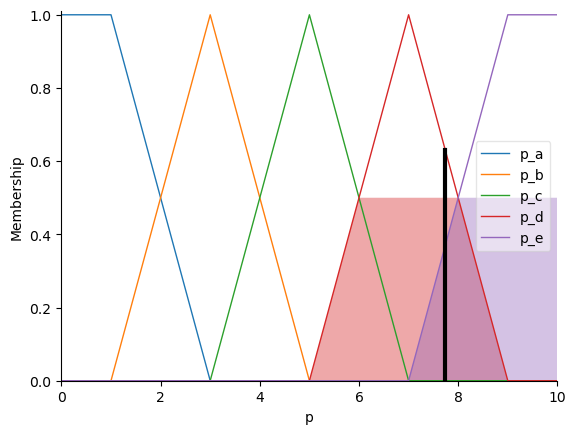

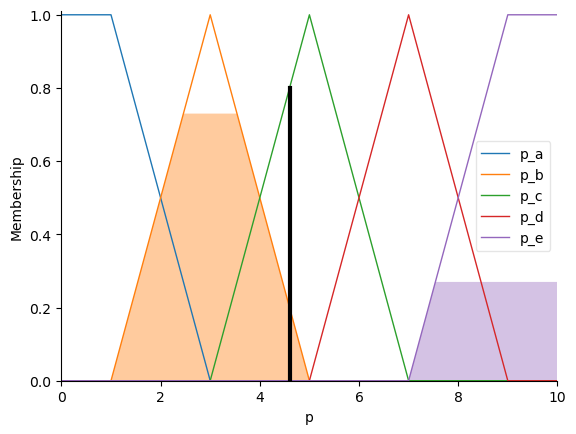

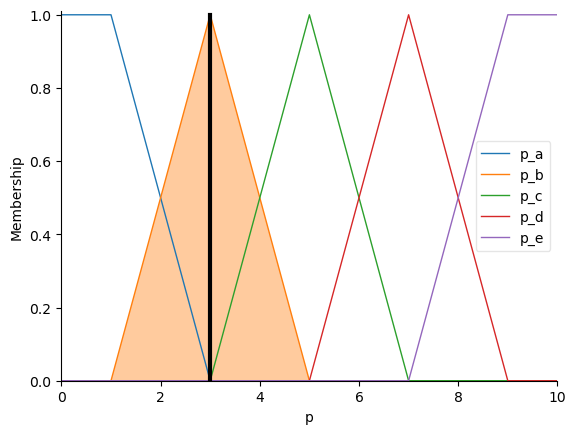

In [6]:
t0_list = [13.3, 18.8, 30.0, 42.3, 47.0]  #valores de temperatura 

for t0 in t0_list:
    sim.input['t'] = t0
    sim.compute()
    # Salida difusa (agregada) -> defuzzificada por defecto (centroid)
    print("Salida nítida p* =", sim.output['p'], " de temp x = ", t0)
    # Curva difusa de salida disponible en: sim.ctrl.outputs['p'].term (interno)
    # Muestra curvas base y la activación/aglomeración resultante + línea del centroide
    y_pres.view(sim=sim)   # 'p' es el Consequent

### punto 3

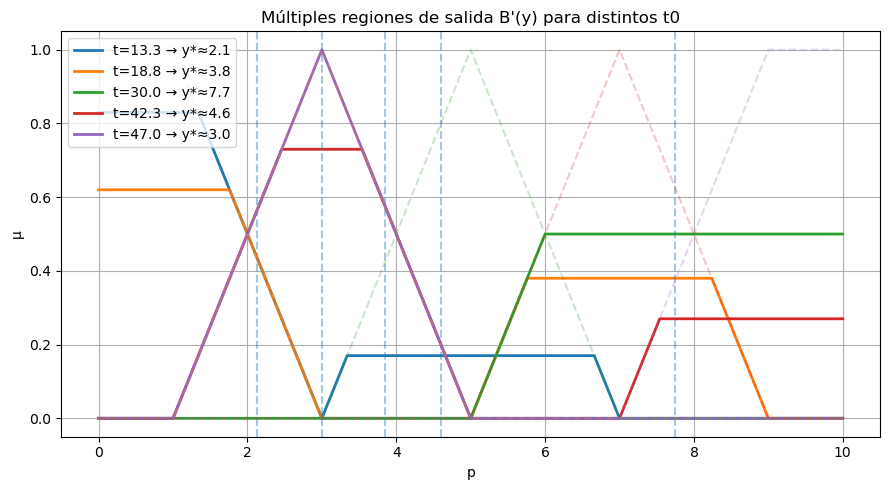

In [19]:
# 1) universo de discurso 
x_temp = np.linspace(0, 50, 1001)      # entrada
y_pres = np.linspace(0, 10, 1001)     # salida

# 2) Funciones de pertenencia
T_A  = fuzz.trapmf(x_temp, [0, 0, 5, 15]) # trapezoidal
T_B  = fuzz.trimf(x_temp, [5, 15, 25])   #
T_C  = fuzz.trimf(x_temp, [15, 25, 35])   
T_D  = fuzz.trimf(x_temp, [25, 35, 45])   
T_E  = fuzz.trapmf(x_temp, [35, 45, 50, 50])

Y_A  = fuzz.trapmf(y_pres, [0, 0, 1, 3]) # trapezoidal
Y_B  = fuzz.trimf(y_pres, [1, 3, 5])   #
Y_C  = fuzz.trimf(y_pres, [3, 5, 7])   
Y_D  = fuzz.trimf(y_pres, [5, 7, 9])   
Y_E  = fuzz.trapmf(y_pres, [7, 9, 10, 10])


def region_agregada(x0, variante='mamdani'):
    # fuzzificación del singleton x0
    mu_ta = fuzz.interp_membership(x_temp, T_A, x0)
    mu_tb = fuzz.interp_membership(x_temp, T_B, x0)
    mu_tc = fuzz.interp_membership(x_temp, T_C, x0)
    mu_td = fuzz.interp_membership(x_temp, T_D, x0)
    mu_te = fuzz.interp_membership(x_temp, T_E, x0)

    if variante.lower() == 'larsen':
        act1 = mu_ta * Y_C
        act2 = mu_tb * Y_A
        act3 = mu_tc * Y_D
        act4 = mu_td * Y_E
        act5 = mu_te * Y_B
    elif variante.lower() == 'zadeh':
        # Implicación de Zadeh: I_Z(w,B)=max(1-w, min(w,B))
        def iz_scaled(w, B):
            # Evita que una regla con w pequeño “inunde” la salida
            return w * np.maximum(1 - w, np.minimum(w, B))
        act1 = iz_scaled(mu_ta, Y_C)  # t_a -> p_c
        act2 = iz_scaled(mu_tb, Y_A)  # t_b -> p_a
        act3 = iz_scaled(mu_tc, Y_D)  # t_c -> p_b
        act4 = iz_scaled(mu_td, Y_E)  # t_d -> p_b
        act5 = iz_scaled(mu_te, Y_B)  # t_e -> p_c        
    else:  # Mamdani (min)
        act1 = np.fmin(mu_ta, Y_C)
        act2 = np.fmin(mu_tb, Y_A)
        act3 = np.fmin(mu_tc, Y_D)
        act4 = np.fmin(mu_td, Y_E)
        act5 = np.fmin(mu_te, Y_B)

    B = np.maximum.reduce([act1, act2, act3, act4, act5])
    y_star = fuzz.defuzz(y_pres, B, 'centroid') if B.max() > 0 else np.nan
    return B, y_star

# ===== Dibujar varias regiones para distintos t0 =====
t0_list = [13.3, 18.8, 30.0, 42.3, 47.0]  #valores de temperatura 
plt.figure(figsize=(9,5))

for t0 in t0_list:
    B, y_star = region_agregada(t0, variante='mamdani')  # o 'larsen'
    plt.plot(y_pres, B, lw=2, label=f't={t0} → y*≈{y_star:.1f}')
    plt.axvline(y_star, ls='--', alpha=0.4)

# Curvas base (opcional, para contexto)
plt.plot(y_pres, Y_A, 'C0--', alpha=0.25)
plt.plot(y_pres, Y_B, 'C1--', alpha=0.25)
plt.plot(y_pres, Y_C, 'C2--', alpha=0.25)
plt.plot(y_pres, Y_D, 'C3--', alpha=0.25)
plt.plot(y_pres, Y_E, 'C4--', alpha=0.25)

plt.title("Múltiples regiones de salida B'(y) para distintos t0")
plt.xlabel('p'); plt.ylabel('μ'); plt.ylim(-0.05, 1.05)
plt.grid(True); plt.legend(loc='upper left'); plt.tight_layout()
plt.show()



In [17]:
#operador de composición Max-Min. 
R1 = np.minimum(T_A[:, None], Y_C[None, :])
R2 = np.minimum(T_B[:, None], Y_A[None, :])
R3 = np.minimum(T_C[:, None], Y_D[None, :])
R4 = np.minimum(T_D[:, None], Y_E[None, :])
R5 = np.minimum(T_E[:, None], Y_B[None, :])
R  = np.maximum.reduce([R1, R2, R3, R4, R5])  # R es |t| x |p|

# ===== 2) Composición máx–mín con entrada singleton x0
def comp_maxmin(A_row, B):  # A_row: (1 x |t|), B: (|t| x |p|)
    return np.max(np.minimum(A_row[:, :, None], B[None, :, :]), axis=1)

x0 = 13.3
Ap = np.zeros_like(x_temp)                          # A'(x): singleton
Ap[np.argmin(np.abs(x_temp - x0))] = 1.0
B_prime_comp = comp_maxmin(Ap[None, :], R)[0]       # (|p|,)

# ===== 3) Salida "manual" (Mamdani: recorte + max) para comparar
mu_ta = fuzz.interp_membership(x_temp, T_A, x0)
mu_tb = fuzz.interp_membership(x_temp, T_B, x0)
mu_tc = fuzz.interp_membership(x_temp, T_C, x0)
mu_td = fuzz.interp_membership(x_temp, T_D, x0)
mu_te = fuzz.interp_membership(x_temp, T_E, x0)

act1 = np.fmin(mu_ta, Y_C)
act2 = np.fmin(mu_tb, Y_A)
act3 = np.fmin(mu_tc, Y_D)
act4 = np.fmin(mu_td, Y_E)
act5 = np.fmin(mu_te, Y_B)
B_prime_manual = np.maximum.reduce([act1, act2, act3, act4, act5])

print("¿Coinciden? ->", np.allclose(B_prime_comp, B_prime_manual, atol=1e-12))

¿Coinciden? -> True


### punto 4 

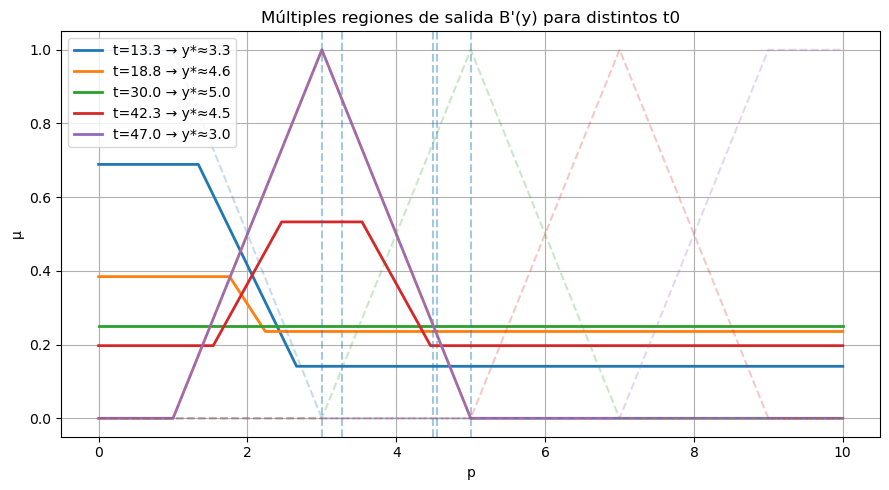

In [20]:
# ===== Dibujar varias regiones para distintos t0 =====
t0_list = [13.3, 18.8, 30.0, 42.3, 47.0]  #valores de temperatura 
plt.figure(figsize=(9,5))

for t0 in t0_list:
    B, y_star = region_agregada(t0, variante='zadeh')  # o 'larsen'
    plt.plot(y_pres, B, lw=2, label=f't={t0} → y*≈{y_star:.1f}')
    plt.axvline(y_star, ls='--', alpha=0.4)

# Curvas base (opcional, para contexto)
plt.plot(y_pres, Y_A, 'C0--', alpha=0.25)
plt.plot(y_pres, Y_B, 'C1--', alpha=0.25)
plt.plot(y_pres, Y_C, 'C2--', alpha=0.25)
plt.plot(y_pres, Y_D, 'C3--', alpha=0.25)
plt.plot(y_pres, Y_E, 'C4--', alpha=0.25)

plt.title("Múltiples regiones de salida B'(y) para distintos t0")
plt.xlabel('p'); plt.ylabel('μ'); plt.ylim(-0.05, 1.05)
plt.grid(True); plt.legend(loc='upper left'); plt.tight_layout()
plt.show()

### punto 5

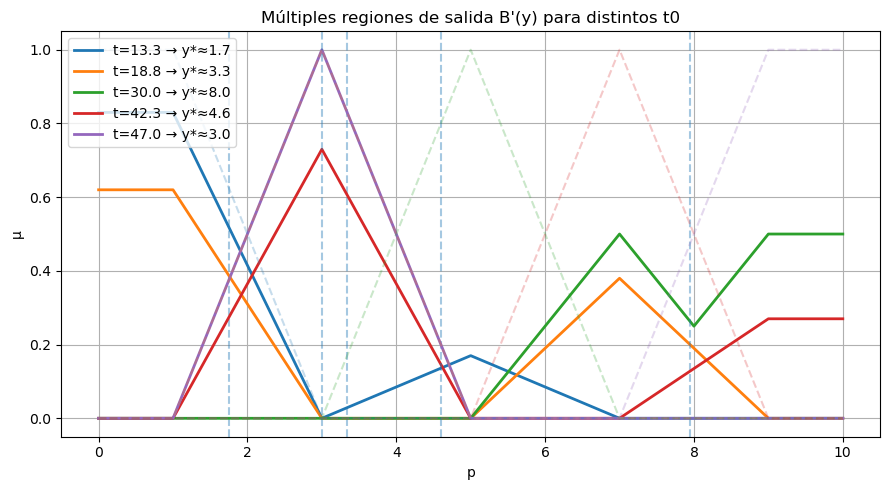

In [10]:
# ===== Dibujar varias regiones para distintos t0 =====
t0_list = [13.3, 18.8, 30.0, 42.3, 47.0]  #valores de temperatura 
plt.figure(figsize=(9,5))

for t0 in t0_list:
    B, y_star = region_agregada(t0, variante='larsen')  # o 'larsen'
    plt.plot(y_pres, B, lw=2, label=f't={t0} → y*≈{y_star:.1f}')
    plt.axvline(y_star, ls='--', alpha=0.4)

# Curvas base (opcional, para contexto)
plt.plot(y_pres, Y_A, 'C0--', alpha=0.25)
plt.plot(y_pres, Y_B, 'C1--', alpha=0.25)
plt.plot(y_pres, Y_C, 'C2--', alpha=0.25)
plt.plot(y_pres, Y_D, 'C3--', alpha=0.25)
plt.plot(y_pres, Y_E, 'C4--', alpha=0.25)

plt.title("Múltiples regiones de salida B'(y) para distintos t0")
plt.xlabel('p'); plt.ylabel('μ'); plt.ylim(-0.05, 1.05)
plt.grid(True); plt.legend(loc='upper left'); plt.tight_layout()
plt.show()